# Scraping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import csv
import os
import glob
import pandas as pd

# URL of Jobicy Remote Jobs API
API_URL = "https://jobicy.com/api/v2/remote-jobs"

# Optional parameters for the API call
params = {
    'count': 50,          # Number of job listings to return
    'tag': 'python'       # Example: keyword to search in job titles and descriptions
}

# Send a GET request to the Jobicy API
response = requests.get(API_URL, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract job listings from the response
    jobs = data.get('jobs', [])

    # Define the CSV file path
    base_csv_file_path = '/content/drive/MyDrive/Colab Notebooks/job/remote_jobs.csv'

    # Check if file already exists and append a number if it does
    file_path = base_csv_file_path
    counter = 1
    while os.path.exists(file_path):
        file_path = f'/content/drive/MyDrive/Colab Notebooks/job/remote_jobs_{counter}.csv'
        counter += 1

    # Open a CSV file for writing
    with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
        # Define the CSV writer
        fieldnames = [
            'JobID', 'JobName', 'Company', 'Location', 'JobDescription',
            'JobType', 'JobIndustry', 'JobLevel', 'PublicationDate'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header
        writer.writeheader()

        # Write job data
        for job in jobs:
            writer.writerow({
                'JobID': job.get('id', ''),
                'JobName': job.get('jobTitle', ''),
                'Company': job.get('companyName', ''),
                'Location': job.get('jobGeo', ''),
                'JobDescription': job.get('jobDescription', '').replace('\n', ' ').replace('\r', ''),
                'JobType': job.get('jobType', ''),
                'JobIndustry': job.get('jobIndustry', ''),
                'JobLevel': job.get('jobLevel', ''),
                'PublicationDate': job.get('pubDate', '')
            })

    print(f"Data saved to {file_path}")
else:
    print(f"Failed to retrieve job listings. Status code: {response.status_code}")

# Membaca file CSV yang baru saja disimpan
df = pd.read_csv(file_path)
# Tampilkan 5 baris pertama dari data
df.head()

Data saved to /content/drive/MyDrive/Colab Notebooks/job/remote_jobs_2.csv


,JobID,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel,PublicationDate
0,111692,Staff Engineer,Varsity Tutors,"Canada, USA",<p>We are looking for a Staff Software Enginee...,['full-time'],['Software Engineering'],Any,2024-12-19 06:26:59
1,73899,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],['Software Engineering'],Any,2024-12-19 06:15:06
2,112607,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],['Data Science'],Any,2024-12-19 06:10:41
3,114045,Mid Full-Stack Developer,Hyland,Poland,<p><strong>Hyland Software</strong> is widely ...,['full-time'],['Programming'],Midweight,2024-12-18 05:06:00
4,110750,Dev Ops,LimeSurvey,Anywhere,"<p>As a DevOps Engineer, you will help us buil...",['full-time'],['DevOps &amp; SysAdmin'],Any,2024-12-18 05:00:32


In [ ]:
import pandas as pd
import os
import glob

# Path folder CSV
folder_path = '/content/drive/MyDrive/Colab Notebooks/job/'

# Ambil semua file CSV di dalam folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Gabungkan semua file CSV
dataframes = []  # List untuk menyimpan DataFrame
for file in csv_files:
    df = pd.read_csv(file)  # Baca file CSV
    dataframes.append(df)   # Tambahkan ke list

# Gabungkan semua DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# ampilkan informasi hasil penggabungan
print("Jumlah file CSV yang digabungkan:", len(csv_files))
print("Jumlah baris setelah digabungkan:", merged_df.shape[0])
print("Nama Kolom:", merged_df.columns)

# Simpan hasil gabungan ke file baru (opsional)
output_path = '/content/drive/MyDrive/Colab Notebooks/job/merged_jobs.csv'
merged_df.to_csv(output_path, index=False)
print("File berhasil disimpan di:", output_path)

Jumlah file CSV yang digabungkan: 5
Jumlah baris setelah digabungkan: 713
Nama Kolom: Index(['JobID', 'JobName', 'Company', 'Location', 'JobDescription', 'JobType',
       'JobIndustry', 'JobLevel', 'PublicationDate'],
      dtype='object')
File berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/job/merged_jobs.csv


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/job/merged_jobs.csv')
data.head()

,JobID,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel,PublicationDate
0,111692,Staff Engineer,Varsity Tutors,"Canada, USA",<p>We are looking for a Staff Software Enginee...,['full-time'],['Software Engineering'],Any,2024-12-19 06:26:59
1,73899,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],['Software Engineering'],Any,2024-12-19 06:15:06
2,112607,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],['Data Science'],Any,2024-12-19 06:10:41
3,114045,Mid Full-Stack Developer,Hyland,Poland,<p><strong>Hyland Software</strong> is widely ...,['full-time'],['Programming'],Midweight,2024-12-18 05:06:00
4,110750,Dev Ops,LimeSurvey,Anywhere,"<p>As a DevOps Engineer, you will help us buil...",['full-time'],['DevOps &amp; SysAdmin'],Any,2024-12-18 05:00:32


In [ ]:
# Cek duplikat
print("Jumlah baris sebelum menghapus duplikat:", merged_df.shape[0])

# Cek baris yang duplikat (berdasarkan semua kolom)
duplicates = merged_df.duplicated()
print("Jumlah duplikat ditemukan:", duplicates.sum())

# Hapus duplikat
merged_df = merged_df.drop_duplicates(ignore_index=True)

# Informasi setelah menghapus duplikat
print("Jumlah baris setelah menghapus duplikat:", merged_df.shape[0])

# Simpan hasil tanpa duplikat (opsional)
output_path_no_duplicates = '/content/drive/MyDrive/Colab Notebooks/job/merged_jobs_no_duplicates.csv'
merged_df.to_csv(output_path_no_duplicates, index=False)
print("File tanpa duplikat berhasil disimpan di:", output_path_no_duplicates)


Jumlah baris sebelum menghapus duplikat: 713
Jumlah duplikat ditemukan: 477
Jumlah baris setelah menghapus duplikat: 236
File tanpa duplikat berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/job/merged_jobs_no_duplicates.csv


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/job/merged_jobs_no_duplicates.csv')
data

,JobID,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel,PublicationDate
0,111692,Staff Engineer,Varsity Tutors,"Canada, USA",<p>We are looking for a Staff Software Enginee...,['full-time'],['Software Engineering'],Any,2024-12-19 06:26:59
1,73899,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],['Software Engineering'],Any,2024-12-19 06:15:06
2,112607,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],['Data Science'],Any,2024-12-19 06:10:41
3,114045,Mid Full-Stack Developer,Hyland,Poland,<p><strong>Hyland Software</strong> is widely ...,['full-time'],['Programming'],Midweight,2024-12-18 05:06:00
4,110750,Dev Ops,LimeSurvey,Anywhere,"<p>As a DevOps Engineer, you will help us buil...",['full-time'],['DevOps &amp; SysAdmin'],Any,2024-12-18 05:00:32
...,...,...,...,...,...,...,...,...,...
231,108604,Developer &amp; Application Support Consultant,Splunk,USA,<div>Splunk is here to build a safer and more ...,['full-time'],['Technical Support'],Any,2024-11-19 03:55:55
232,108602,Senior Machine Learning Engineer - Hotels Flex...,Hopper,"Canada, USA","<div class=""section page-centered"" data-qa=""jo...",['full-time'],['Software Engineering'],Senior,2024-11-19 03:51:01
233,112607,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],['Data Science'],Any,2024-11-18 04:54:41
234,73899,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],['Software Engineering'],Any,2024-11-18 04:47:06


# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Pemanggilan data dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Inisialisasi data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/job/merged_jobs_no_duplicates.csv')
df

,JobID,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel,PublicationDate
0,111692,Staff Engineer,Varsity Tutors,"Canada, USA",<p>We are looking for a Staff Software Enginee...,['full-time'],['Software Engineering'],Any,2024-12-19 06:26:59
1,73899,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],['Software Engineering'],Any,2024-12-19 06:15:06
2,112607,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],['Data Science'],Any,2024-12-19 06:10:41
3,114045,Mid Full-Stack Developer,Hyland,Poland,<p><strong>Hyland Software</strong> is widely ...,['full-time'],['Programming'],Midweight,2024-12-18 05:06:00
4,110750,Dev Ops,LimeSurvey,Anywhere,"<p>As a DevOps Engineer, you will help us buil...",['full-time'],['DevOps &amp; SysAdmin'],Any,2024-12-18 05:00:32
...,...,...,...,...,...,...,...,...,...
231,108604,Developer &amp; Application Support Consultant,Splunk,USA,<div>Splunk is here to build a safer and more ...,['full-time'],['Technical Support'],Any,2024-11-19 03:55:55
232,108602,Senior Machine Learning Engineer - Hotels Flex...,Hopper,"Canada, USA","<div class=""section page-centered"" data-qa=""jo...",['full-time'],['Software Engineering'],Senior,2024-11-19 03:51:01
233,112607,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],['Data Science'],Any,2024-11-18 04:54:41
234,73899,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],['Software Engineering'],Any,2024-11-18 04:47:06


# EDA (Explatory Data Analysis)

In [ ]:
print(df.head(3))
print('----------')
print('Shape: ', df.shape)
print('----------')
print(df.dtypes)
print('----------')
print(df.describe())
print('----------')
print('Data Null?')
print(df.isnull().sum())
print('----------')
print('Duplicate?')
print(df.duplicated().sum())

    JobID            JobName         Company      Location  \
0  111692     Staff Engineer  Varsity Tutors  Canada,  USA   
1   73899  Research Engineer  Chainlink Labs      Anywhere   
2  112607     Data Scientist       Study.com        Mexico   

                                      JobDescription        JobType  \
0  <p>We are looking for a Staff Software Enginee...  ['full-time']   
1  <p>Chainlink Labs is seeking Research Engineer...  ['full-time']   
2  <p>We&#8217;re looking for a Data Scientist to...  ['full-time']   

                JobIndustry JobLevel      PublicationDate  
0  ['Software Engineering']      Any  2024-12-19 06:26:59  
1  ['Software Engineering']      Any  2024-12-19 06:15:06  
2          ['Data Science']      Any  2024-12-19 06:10:41  
----------
Shape:  (236, 9)
----------
JobID               int64
JobName            object
Company            object
Location           object
JobDescription     object
JobType            object
JobIndustry        object
JobLe

In [ ]:
# Bersihkan karakter yang tidak diinginkan di kolom 'JobIndustry'
if 'JobIndustry' in df.columns:
    df['JobIndustry'] = (
        df['JobIndustry']
        .str.strip("[]")               # Menghapus tanda kurung
        .str.replace("'", "")          # Menghapus tanda kutip tunggal
        .str.replace(r"&amp;", "&", regex=True)  # Mengubah '&amp;' menjadi '&'
        .str.split(', ')               # Memisahkan berdasarkan koma
    )

    # Memecah daftar menjadi baris individual
    df = df.explode('JobIndustry').reset_index(drop=True)
else:
    print("Kolom 'JobIndustry' tidak ditemukan dalam dataset.")
    exit()


# Menghitung distribusi berdasarkan kolom 'JobIndustry'
industry_counts = df['JobIndustry'].value_counts()

In [ ]:
import plotly.graph_objects as go

# Data untuk pie chart
labels = industry_counts.index
values = industry_counts.values

# Daftar warna khusus untuk pie chart
custom_colors = [
    "#143046",
    "#589BD2",
    "#9BCFF2",
    "#FCF5DB",
    "#F0CD8D",
    "#EC9770",
    "#1595A0",
    "#1381A2",
    "#8A99A7",
    "#044348",
]

# Membuat pie chart 3D
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            hole=0.3,  # Untuk efek 3D
            pull=[0.05] * len(labels),  # Sedikit menarik elemen keluar untuk tampilan 3D
            marker=dict(colors=custom_colors),  # Mengatur warna custom
        )
    ]
)

# Menambahkan layout untuk tampilan 3D
fig.update_traces(textinfo="percent+label", textfont_size=12)
fig.update_layout(
    title="Komposisi Pekerjaan Berdasarkan Industri (Pie Chart 3D dengan Warna Kustom)",
    template="plotly_white",  # Template putih untuk visibilitas warna
)

fig.show()

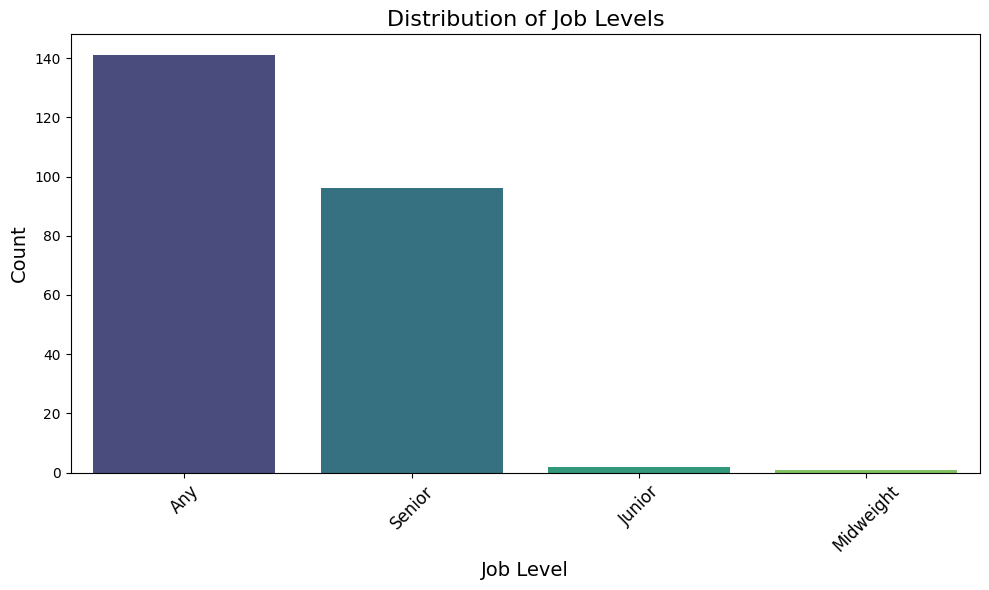

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pekerjaan berdasarkan tingkatannya
job_level_counts = df["JobLevel"].value_counts()

# Membuat visualisasi dengan hue yang sesuai
plt.figure(figsize=(10, 6))
sns.barplot(x=job_level_counts.index, y=job_level_counts.values, hue=job_level_counts.index, palette="viridis", legend=False)
plt.title("Distribution of Job Levels", fontsize=16)
plt.xlabel("Job Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Menampilkan grafik
plt.show()


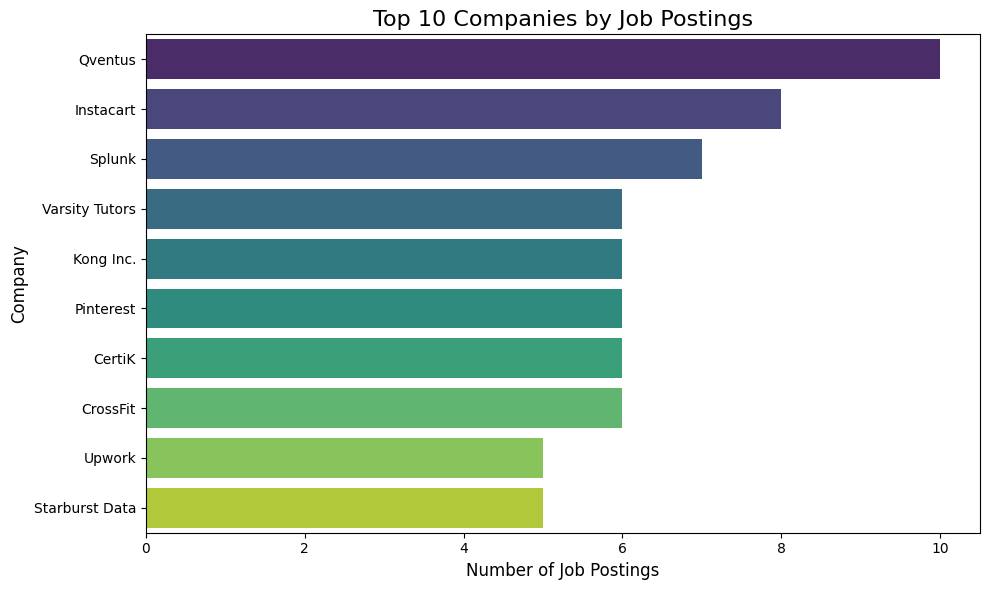

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah pekerjaan per perusahaan
company_counts = df["Company"].value_counts()

# Plot distribusi perusahaan
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.values[:10], y=company_counts.index[:10], hue=company_counts.index[:10], palette="viridis", dodge=False)

# Menambahkan judul dan label
plt.title("Top 10 Companies by Job Postings", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=12)
plt.ylabel("Company", fontsize=12)

# Memperbaiki layout
plt.tight_layout()

# Menampilkan grafik
plt.show()


# Preprocessing

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.drop(columns=["PublicationDate", "JobID"])

In [ ]:
df

,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel
0,Staff Engineer,Varsity Tutors,"Canada, USA",<p>We are looking for a Staff Software Enginee...,['full-time'],Software Engineering,Any
1,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],Software Engineering,Any
2,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],Data Science,Any
3,Mid Full-Stack Developer,Hyland,Poland,<p><strong>Hyland Software</strong> is widely ...,['full-time'],Programming,Midweight
4,Dev Ops,LimeSurvey,Anywhere,"<p>As a DevOps Engineer, you will help us buil...",['full-time'],DevOps & SysAdmin,Any
...,...,...,...,...,...,...,...
235,Developer &amp; Application Support Consultant,Splunk,USA,<div>Splunk is here to build a safer and more ...,['full-time'],Technical Support,Any
236,Senior Machine Learning Engineer - Hotels Flex...,Hopper,"Canada, USA","<div class=""section page-centered"" data-qa=""jo...",['full-time'],Software Engineering,Senior
237,Data Scientist,Study.com,Mexico,<p>We&#8217;re looking for a Data Scientist to...,['full-time'],Data Science,Any
238,Research Engineer,Chainlink Labs,Anywhere,<p>Chainlink Labs is seeking Research Engineer...,['full-time'],Software Engineering,Any


In [ ]:
# Memisahkan data berdasarkan koma
df['Location'] = df['Location'].str.split(', ')

# Memecah daftar menjadi baris individual
df = df.explode('Location').reset_index(drop=True)

In [ ]:
# # Mengisi nilai NaN dengan string kosong
# df['JobIndustry'] = df['JobIndustry'].fillna("")

# # Memisahkan data berdasarkan koma, menghapus tanda kurung [' '], dan membersihkan '&amp;'
# df['JobIndustry'] = (
#     df['JobIndustry']
#     .str.strip("[]")               # Menghapus tanda kurung
#     .str.replace("'", "")          # Menghapus tanda kutip tunggal
#     .str.replace(r"&amp;", "&", regex=True)  # Mengubah '&amp;' menjadi '&'
#     .str.split(', ')               # Memisahkan berdasarkan koma
# )

# # Memecah daftar menjadi baris individual
# df = df.explode('JobIndustry').reset_index(drop=True)

In [ ]:
# Menampilkan daftar unik dari JobIndustry
unique_industries = df['JobIndustry'].unique()

# Cetak daftar unik
print("Unique Job Industries:")
for industry in unique_industries:
    print(industry)


Unique Job Industries:
Software Engineering
Data Science
Programming
DevOps & SysAdmin
Product & Operations
Marketing & Sales
Sales
Technical Support
Customer Success


In [ ]:
# Mengisi nilai NaN dengan string kosong
df['JobName'] = df['JobName'].fillna("")

# Membersihkan '&amp;'
df['JobName'] = (df['JobName'].str.replace(r"&amp;", "&", regex=True))

# Memecah daftar menjadi baris individual
df = df.explode('JobName').reset_index(drop=True)

In [ ]:
# Menampilkan daftar unik dari JobIndustry
unique_job = df['JobName'].unique()

# Cetak daftar unik
print("Unique Job Name:")
for job in unique_job:
    print(job)

Unique Job Name:
Staff Engineer
Research Engineer
Data Scientist
Mid Full-Stack Developer
Dev Ops
Engineering Manager
Solutions Engineer
Senior Software Engineer II
Senior Data Engineer
Junior Cloud Delivery Engineer
Intermediate Backend Engineer, ModelOps:MLOps
Sr. Machine Learning Engineer
Staff Security Engineer
Senior Software Engineer - API Gateway (Europe)
Senior Software Engineer, Chatbot AI
Senior DevOps Engineer
Staff Back-End Engineer - South America
Data Engineer
Staff Software Engineer, Backend
Software Engineer
Principal Software Engineer
Sr. Cloud Engineer - Security Focus
Senior Data Scientist, Commercial Strategy
Big Data Developer
Senior Backend Engineer (GenAI)
Software Engineer II
Large Language Model (LLM) AI Research Engineer
Senior Site Reliability Engineer
Research Scientist (Voice AI Foundations)
Sr. Software Engineer - Backend
Solutions Architect
Software Engineer, Python - Mid / Senior
Staff Software Engineer
Data Scientist - Growth
Staff Site Reliability Engi

In [ ]:
# Menghapus tanda kurung [' ']
df['JobType'] = df['JobType'].str.strip("[]").str.replace("'", "")

# Memecah daftar menjadi baris individual
df = df.explode('JobType').reset_index(drop=True)

In [ ]:
# Hitung total perusahaan unik
total_companies = df["Company"].nunique()
print("Total unique companies:", total_companies)
# Hitung total level pekerjaan unik
total_jobname = df["JobName"].nunique()
print("Total unique job name:", total_jobname)
# Hitung total tipe pekerjaan unik
total_jobtype = df["JobType"].nunique()
print("Total unique job type:", total_jobtype)
# Hitung total industri pekerjaan unik
total_jobindustry = df["JobIndustry"].nunique()
print("Total unique job industry:", total_jobindustry)
# Hitung total level pekerjaan unik
total_joblevel = df["JobLevel"].nunique()
print("Total unique job level:", total_joblevel)

Total unique companies: 80
Total unique job name: 142
Total unique job type: 3
Total unique job industry: 9
Total unique job level: 4


In [ ]:
# Menghapus Tag HTML
def remove_html_tags(text):
    if not isinstance(text, str):  # Pastikan input adalah string
        return ""
    return re.sub(r"<.*?>", "", text)

# Terapkan fungsi pada kolom JobDescription
df["JobDescription"] = df["JobDescription"].apply(remove_html_tags)

In [ ]:
# Menghapus Simbol Khusus dan Angka
def remove_special_characters(text):
    return re.sub(r"[^a-zA-Z\s]", "", text)

# Terapkan fungsi
df["JobDescription"] = df["JobDescription"].apply(remove_special_characters)


In [ ]:
df

,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel
0,Staff Engineer,Varsity Tutors,Canada,We are looking for a Staff Software Engineer b...,full-time,Software Engineering,Any
1,Staff Engineer,Varsity Tutors,USA,We are looking for a Staff Software Engineer b...,full-time,Software Engineering,Any
2,Research Engineer,Chainlink Labs,Anywhere,Chainlink Labs is seeking Research Engineers t...,full-time,Software Engineering,Any
3,Data Scientist,Study.com,Mexico,Were looking for a Data Scientist to join our ...,full-time,Data Science,Any
4,Mid Full-Stack Developer,Hyland,Poland,Hyland Software is widely known as a great com...,full-time,Programming,Midweight
...,...,...,...,...,...,...,...
329,Senior Machine Learning Engineer - Hotels Flex...,Hopper,USA,As a Senior Machine Learning Engineer your fo...,full-time,Software Engineering,Senior
330,Data Scientist,Study.com,Mexico,Were looking for a Data Scientist to join our ...,full-time,Data Science,Any
331,Research Engineer,Chainlink Labs,Anywhere,Chainlink Labs is seeking Research Engineers t...,full-time,Software Engineering,Any
332,Staff Engineer,Varsity Tutors,Canada,We are looking for a Staff Software Engineer b...,full-time,Software Engineering,Any


In [ ]:
# Mengubah Teks Menjadi Huruf Kecil
def to_lowercase(text):
    return text.lower()

# Terapkan fungsi
df["JobDescription"] = df["JobDescription"].apply(to_lowercase)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Inisialisasi stemmer dan stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

In [ ]:
# Menghapus Stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenisasi
    return " ".join([word for word in tokens if word not in stop_words])

# Terapkan fungsi
df["JobDescription"] = df["JobDescription"].apply(remove_stopwords)

In [ ]:
# # Stemming
# def apply_stemming(text):
#     tokens = word_tokenize(text)  # Tokenisasi
#     return " ".join([stemmer.stem(word) for word in tokens])

# # Terapkan fungsi
# df["JobDescription"] = df["JobDescription"].apply(apply_stemming)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in tokens])

df["JobDescription"] = df["JobDescription"].apply(apply_lemmatization)

In [ ]:
df.to_csv("jobs_data.csv", index=False)
print("DataFrame telah disimpan sebagai jobs_data.csv")

DataFrame telah disimpan sebagai jobs_data.csv


In [ ]:
df

,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel
0,Staff Engineer,Varsity Tutors,Canada,looking staff software engineer based north am...,full-time,Software Engineering,Any
1,Staff Engineer,Varsity Tutors,USA,looking staff software engineer based north am...,full-time,Software Engineering,Any
2,Research Engineer,Chainlink Labs,Anywhere,chainlink lab seeking research engineer suppor...,full-time,Software Engineering,Any
3,Data Scientist,Study.com,Mexico,looking data scientist join growing team ideal...,full-time,Data Science,Any
4,Mid Full-Stack Developer,Hyland,Poland,hyland software widely known great company wor...,full-time,Programming,Midweight
...,...,...,...,...,...,...,...
329,Senior Machine Learning Engineer - Hotels Flex...,Hopper,USA,senior machine learning engineer focus solving...,full-time,Software Engineering,Senior
330,Data Scientist,Study.com,Mexico,looking data scientist join growing team ideal...,full-time,Data Science,Any
331,Research Engineer,Chainlink Labs,Anywhere,chainlink lab seeking research engineer suppor...,full-time,Software Engineering,Any
332,Staff Engineer,Varsity Tutors,Canada,looking staff software engineer based north am...,full-time,Software Engineering,Any


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Encode kolom kategori
df["Company"] = encoder.fit_transform(df["Company"])
df["Location"] = encoder.fit_transform(df["Location"])
df["JobName"] = encoder.fit_transform(df["JobName"])
df["JobType"] = encoder.fit_transform(df["JobType"])
df["JobIndustry"] = encoder.fit_transform(df["JobIndustry"])
df["JobLevel"] = encoder.fit_transform(df["JobLevel"])

In [ ]:
df

,JobName,Company,Location,JobDescription,JobType,JobIndustry,JobLevel
0,130,74,21,looking staff software engineer based north am...,1,7,0
1,130,74,17,looking staff software engineer based north am...,1,7,0
2,45,10,19,chainlink lab seeking research engineer suppor...,1,7,0
3,23,65,26,looking data scientist join growing team ideal...,1,1,0
4,42,33,27,hyland software widely known great company wor...,1,5,2
...,...,...,...,...,...,...,...
329,74,32,17,senior machine learning engineer focus solving...,1,7,3
330,23,65,26,looking data scientist join growing team ideal...,1,1,0
331,45,10,19,chainlink lab seeking research engineer suppor...,1,7,0
332,130,74,21,looking staff software engineer based north am...,1,7,0


In [ ]:
print(df.dtypes)

JobName            int64
Company            int64
Location           int64
JobDescription    object
JobType            int64
JobIndustry        int64
JobLevel           int64
dtype: object


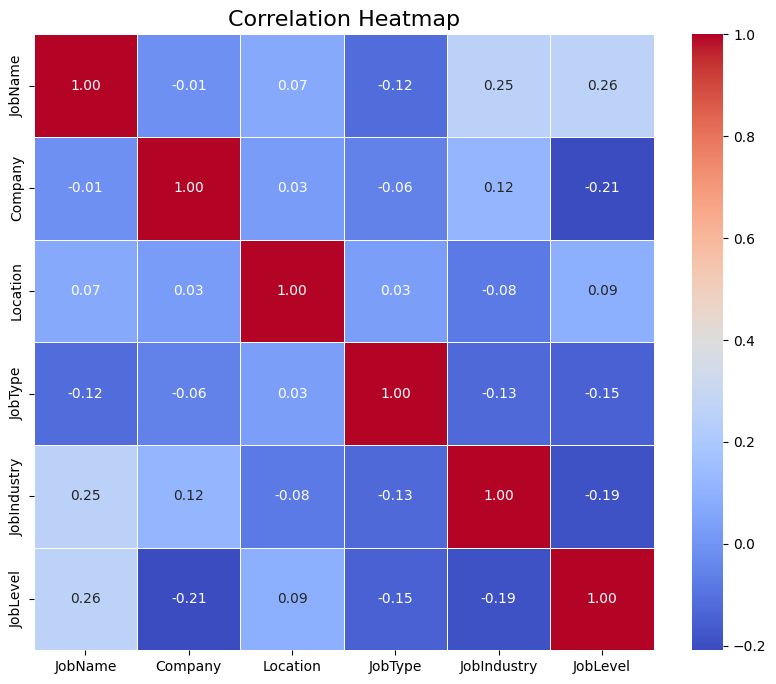

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memastikan hanya kolom numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitur (X) dan Target (y)
X = df[['Company', 'Location', 'JobName', 'JobType', 'JobDescription']]  # Fitur
y = df['JobIndustry']  # Target berupa nama pekerjaan

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Skenario : Menggunakan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Tentukan jumlah fitur maksimal
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['JobDescription'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['JobDescription'])

In [ ]:
from scipy.sparse import hstack

X_train_final = hstack([X_train.drop(columns=['JobDescription']), X_train_tfidf])
X_test_final = hstack([X_test.drop(columns=['JobDescription']), X_test_tfidf])

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
rf_tfidf.fit(X_train_final, y_train)

# Prediksi pada data uji
y_pred_rf_tfidf = rf_tfidf.predict(X_test_final)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tfidf))

Accuracy: 0.9552238805970149


In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Membuat model Support Vector Machine (SVM)
svm_tfidf = SVC(kernel='linear', random_state=42)

# Melatih model dengan data latih
svm_tfidf.fit(X_train_final, y_train)

# Prediksi pada data uji
y_pred_svm_tfidf = svm_tfidf.predict(X_test_final)

# Evaluasi model
print("Accuracy (SVM with TF-IDF):", accuracy_score(y_test, y_pred_svm_tfidf))

Accuracy (SVM with TF-IDF): 0.9402985074626866


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
lr_tfidf = LogisticRegression(max_iter=1000, random_state=42)

# Melatih model dengan data latih
lr_tfidf.fit(X_train_final, y_train)

# Prediksi pada data uji
y_pred_lr_tfidf = lr_tfidf.predict(X_test_final)

# Evaluasi model
print("Accuracy (Logistic Regression with TF-IDF):", accuracy_score(y_test, y_pred_lr_tfidf))

Accuracy (Logistic Regression with TF-IDF): 0.8507462686567164


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Membuat model Naive Bayes
nb_tfidf = MultinomialNB()

# Melatih model dengan data latih
nb_tfidf.fit(X_train_final, y_train)

# Prediksi pada data uji
y_pred_nb_tfidf = nb_tfidf.predict(X_test_final)

# Evaluasi model
print("Accuracy (Naive Bayes with TF-IDF):", accuracy_score(y_test, y_pred_nb_tfidf))

Accuracy (Naive Bayes with TF-IDF): 0.5970149253731343


In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
knn_tfidf = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih
knn_tfidf.fit(X_train_final, y_train)

# Prediksi pada data uji
y_pred_knn_tfidf = knn_tfidf.predict(X_test_final)

# Evaluasi model
print("Accuracy (KNN with TF-IDF):", accuracy_score(y_test, y_pred_knn_tfidf))

Accuracy (KNN with TF-IDF): 0.7014925373134329


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt_tfidf = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dt_tfidf.fit(X_train_final, y_train)

# Prediksi pada data uji
y_pred_dt_tfidf = dt_tfidf.predict(X_test_final)

# Evaluasi model
print("Accuracy (Decision Tree with TF-IDF):", accuracy_score(y_test, y_pred_dt_tfidf))

Accuracy (Decision Tree with TF-IDF): 0.9552238805970149


## Skenario : Menggunakan Bag of Words (BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Menggunakan CountVectorizer untuk tokenisasi JobDescription
bow_vectorizer = CountVectorizer(max_features=5000)  # Membatasi jumlah fitur untuk efisiensi
X_bow = bow_vectorizer.fit_transform(df['JobDescription'])  # Tokenisasi hanya JobDescription

# Menggunakan kolom lain selain JobDescription
X_other = df[['Company', 'Location', 'JobName', 'JobType']].fillna("")  # Mengisi NaN jika ada

# Mengonversi X_other menjadi representasi numerik dengan One-Hot Encoding
X_other_encoded = pd.get_dummies(X_other, columns=['Company', 'Location', 'JobType', 'JobName'])

# Menggabungkan fitur BoW dan kolom lain
X_combined = hstack([X_bow, X_other_encoded])

# Menggunakan JobIndustry sebagai target (misalnya)
y = df['JobIndustry']

# Membagi data menjadi data latih dan data uji (80%-20%)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
rf_bow.fit(X_train_bow, y_train)

# Prediksi pada data uji
y_pred_rf_bow = rf_bow.predict(X_test_bow)

# Evaluasi model
print("Accuracy (Random Forest with BoW):", accuracy_score(y_test, y_pred_rf_bow))

Accuracy (Random Forest with BoW): 0.9552238805970149


In [ ]:
# Support Vector Machine (SVM)
svm_bow = SVC(kernel='linear', random_state=42)

# Melatih model dengan data latih
svm_bow.fit(X_train_bow, y_train)

# Prediksi pada data uji
y_pred_svm_bow = svm_bow.predict(X_test_bow)

# Evaluasi model
print("Accuracy (SVM with BoW):", accuracy_score(y_test, y_pred_svm_bow))


Accuracy (SVM with BoW): 0.9402985074626866


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_bow = LogisticRegression(max_iter=1000, random_state=42)

# Melatih model dengan data latih
lr_bow.fit(X_train_bow, y_train)

# Prediksi pada data uji
y_pred_lr_bow = lr_bow.predict(X_test_bow)

# Evaluasi model
print("Accuracy (Logistic Regression with BoW):", accuracy_score(y_test, y_pred_lr_bow))

Accuracy (Logistic Regression with BoW): 0.9552238805970149


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Membuat model Naive Bayes
nb_bow = MultinomialNB()

# Melatih model dengan data latih
nb_bow.fit(X_train_bow, y_train)

# Prediksi pada data uji
y_pred_nb_bow = nb_bow.predict(X_test_bow)

# Evaluasi model
print("Accuracy (Naive Bayes with BoW):", accuracy_score(y_test, y_pred_nb_bow))

Accuracy (Naive Bayes with BoW): 0.9552238805970149


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
knn_bow = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih
knn_bow.fit(X_train_bow, y_train)

# Prediksi pada data uji
y_pred_knn_bow = knn_bow.predict(X_test_bow)

# Evaluasi model
print("Accuracy (KNN with BoW):", accuracy_score(y_test, y_pred_knn_bow))

Accuracy (KNN with BoW): 0.7910447761194029


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt_bow = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dt_bow.fit(X_train_bow, y_train)

# Prediksi pada data uji
y_pred_dt_bow = dt_bow.predict(X_test_bow)

# Evaluasi model
print("Accuracy (Decision Tree with BoW):", accuracy_score(y_test, y_pred_dt_bow))

Accuracy (Decision Tree with BoW): 0.9552238805970149


## Skenario : BERT

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Function to Generate BERT Embeddings
def get_bert_embeddings(texts):
    embeddings = []
    for text in tqdm(texts, desc="Generating BERT embeddings"):
        # Ensure the text is a string
        if not isinstance(text, str):
            text = str(text)
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        outputs = bert_model(**inputs)
        # Use the [CLS] token embedding (first token)
        cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)

X_encoded = df[['Company', 'Location', 'JobType', 'JobName']].values  # Fitur lainnya
job_descriptions = df['JobDescription']  # Kolom untuk BERT embeddings
y = df['JobIndustry']  # Target

# Generate BERT Embeddings for JobDescription
bert_embeddings = get_bert_embeddings(job_descriptions)

# Combine Non-Text Features and BERT Embeddings
X = np.hstack([X_encoded, bert_embeddings])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate BERT Embeddings untuk data latih dan uji
X_train_embeddings = get_bert_embeddings(X_train)
X_test_embeddings = get_bert_embeddings(X_test)

Generating BERT embeddings:  42%|████▏     | 141/334 [01:06<01:31,  2.11it/s]


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf_bert = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
rf_bert.fit(X_train_embeddings, y_train)

# Prediksi pada data uji
y_pred_rf_bert = rf_bert.predict(X_test_embeddings)

# Evaluasi model
print("Accuracy (Random Forest with BERT):", accuracy_score(y_test, y_pred_rf_bert))

Accuracy (Random Forest with BERT): 0.5223880597014925


In [ ]:
from sklearn.svm import SVC

# Model Support Vector Machine (SVM)
svm_bert = SVC(kernel='linear', random_state=42)

# Melatih model dengan data latih
svm_bert.fit(X_train_embeddings, y_train)

# Prediksi pada data uji
y_pred_svm_bert = svm_bert.predict(X_test_embeddings)


# Evaluasi model
print("Accuracy (SVM with BERT):", accuracy_score(y_test, y_pred_svm_bert))

Accuracy (SVM with BERT): 0.5522388059701493


In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Logistic Regression
lr_bert = LogisticRegression(max_iter=1000, random_state=42)

# Melatih model dengan data latih
lr_bert.fit(X_train_embeddings, y_train)

# Prediksi pada data uji
y_pred_lr_bert = lr_bert.predict(X_test_embeddings)

# Evaluasi model
print("Accuracy (Logistic Regression with BERT):", accuracy_score(y_test, y_pred_lr_bert))

Accuracy (Logistic Regression with BERT): 0.43283582089552236


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Model Naive Bayes
nb_bert = MultinomialNB()

# Melatih model dengan data latih
nb_bert.fit(np.abs(X_train_embeddings), y_train)

# Prediksi pada data uji
y_pred_nb_bert = nb_bert.predict(X_test_embeddings)

# Evaluasi model
print("Accuracy (Naive Bayes with BERT):", accuracy_score(y_test, y_pred_nb_bert))

Accuracy (Naive Bayes with BERT): 0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model K-Nearest Neighbors (KNN)
knn_bert = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih
knn_bert.fit(X_train_embeddings, y_train)

# Prediksi pada data uji
y_pred_knn_bert = knn_bert.predict(X_test_embeddings)

# Evaluasi model
print("Accuracy (KNN with BERT):", accuracy_score(y_test, y_pred_knn_bert))

Accuracy (KNN with BERT): 0.23880597014925373


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model Decision Tree
dt_bert = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dt_bert.fit(X_train_embeddings, y_train)

# Prediksi pada data uji
y_pred_dt_bert = dt_bert.predict(X_test_embeddings)

# Evaluasi model
print("Accuracy (Decision Tree with BERT):", accuracy_score(y_test, y_pred_dt_bert))

Accuracy (Decision Tree with BERT): 0.5223880597014925


## Skenario : Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
import nltk
from sklearn.preprocessing import StandardScaler

# Pastikan NLTK stopwords diunduh jika belum ada
nltk.download('punkt')

# Preprocessing Teks: Tokenisasi dan Pembersihan
def preprocess_text(text):
    # Tokenisasi
    tokens = word_tokenize(text.lower())  # Tokenisasi dan menjadi lowercase
    return tokens

# Memuat Data
df['JobDescription_Tokens'] = df['JobDescription'].apply(preprocess_text)  # Proses hanya JobDescription
X_text = df['JobDescription_Tokens']
X_others = df[['Company', 'Location', 'JobType', 'JobName']]  # Kolom tambahan
y = df['JobIndustry']

# Encode data lainnya jika belum diubah menjadi numerik
X_others_encoded = pd.get_dummies(X_others, columns=['Company', 'Location', 'JobType', 'JobName'])

# Split Data
X_text_train, X_text_test, X_others_train, X_others_test, y_train, y_test = train_test_split(
    X_text, X_others_encoded, y, test_size=0.2, random_state=42
)

# Melatih Model Word2Vec menggunakan Gensim
# Training Word2Vec pada data latih
word2vec_model = Word2Vec(sentences=X_text_train, vector_size=100, window=5, min_count=1, workers=4)

# Fungsi untuk mendapatkan rata-rata vektor dari teks
def get_average_word2vec(tokens_list, model, vector_size=100):
    # Mengambil rata-rata vektor kata dalam teks
    vectors = []
    for word in tokens_list:
        try:
            # Ambil vektor kata, jika ada dalam model
            vectors.append(model.wv[word])
        except KeyError:
            # Jika kata tidak ditemukan dalam model, bisa menggunakan vektor nol
            vectors.append(np.zeros(vector_size))

    # Jika tidak ada kata yang ada dalam model, kembalikan vektor nol
    if len(vectors) == 0:
        return np.zeros(vector_size)

    # Menghitung rata-rata vektor
    return np.mean(vectors, axis=0)

# Menghasilkan fitur rata-rata Word2Vec untuk data latih dan uji
X_train_word2vec = np.array([get_average_word2vec(tokens, word2vec_model) for tokens in X_text_train])
X_test_word2vec = np.array([get_average_word2vec(tokens, word2vec_model) for tokens in X_text_test])

# Standarisasi Fitur Non-Teks
scaler = StandardScaler()
X_others_train_scaled = scaler.fit_transform(X_others_train)
X_others_test_scaled = scaler.transform(X_others_test)

# Gabungkan fitur Word2Vec dan fitur tambahan
X_train_combined = np.hstack([X_train_word2vec, X_others_train_scaled])
X_test_combined = np.hstack([X_test_word2vec, X_others_test_scaled])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Model Random Forest
rf_word2vec = RandomForestClassifier(n_estimators=100, random_state=42)
rf_word2vec.fit(X_train_combined, y_train)
y_pred_rf_word2vec = rf_word2vec.predict(X_test_combined)
print("Accuracy (Random Forest with Word2Vec):", accuracy_score(y_test, y_pred_rf_word2vec))

Accuracy (Random Forest with Word2Vec): 0.9253731343283582


In [ ]:
# Model Support Vector Machine (SVM)
svm_word2vec = SVC(kernel='linear', random_state=42)
svm_word2vec.fit(X_train_combined, y_train)
y_pred_svm_word2vec = svm_word2vec.predict(X_test_combined)
print("Accuracy (SVM with Word2Vec):", accuracy_score(y_test, y_pred_svm_word2vec))

Accuracy (SVM with Word2Vec): 0.9552238805970149


In [ ]:
# Model Logistic Regression
lr_word2vec = LogisticRegression(max_iter=1000, random_state=42)
lr_word2vec.fit(X_train_combined, y_train)
y_pred_lr_word2vec = lr_word2vec.predict(X_test_combined)
print("Accuracy (Logistic Regression with Word2Vec):", accuracy_score(y_test, y_pred_lr_word2vec))

Accuracy (Logistic Regression with Word2Vec): 0.9253731343283582


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Menggunakan Naive Bayes setelah normalisasi
nb_word2vec = MultinomialNB()
nb_word2vec.fit(X_train_scaled, y_train)
y_pred_nb_word2vec = nb_word2vec.predict(X_test_scaled)
print("Accuracy (Naive Bayes with Word2Vec and Normalized Data):", accuracy_score(y_test, y_pred_nb_word2vec))

Accuracy (Naive Bayes with Word2Vec and Normalized Data): 0.7910447761194029


In [ ]:
# Model K-Nearest Neighbors (KNN)
knn_word2vec = KNeighborsClassifier(n_neighbors=5)
knn_word2vec.fit(X_train_combined, y_train)
y_pred_knn_word2vec = knn_word2vec.predict(X_test_combined)
print("Accuracy (KNN with Word2Vec):", accuracy_score(y_test, y_pred_knn_word2vec))

Accuracy (KNN with Word2Vec): 0.7313432835820896


In [ ]:
# Model Decision Tree
dt_word2vec = DecisionTreeClassifier(random_state=42)
dt_word2vec.fit(X_train_combined, y_train)
y_pred_dt_word2vec = dt_word2vec.predict(X_test_combined)
print("Accuracy (Decision Tree with Word2Vec):", accuracy_score(y_test, y_pred_dt_word2vec))

Accuracy (Decision Tree with Word2Vec): 0.9402985074626866


# Menyimpan Model (AKHIR)

In [ ]:
import joblib

# Simpan model
joblib.dump(dt_bow, "job_classification_model.pkl")

# # Simpan TfidfVectorizer
# joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Simpan BoWVectorizer
joblib.dump(bow_vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

# Streamlit

In [ ]:
# Instal Streamlit dan Ngrok
!pip install streamlit
!pip install pyngrok

In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load model, vectorizer, dan dataset
try:
    model = joblib.load("job_classification_model.pkl")
    vectorizer = joblib.load("vectorizer.pkl")
except FileNotFoundError:
    st.error("Model atau vectorizer tidak ditemukan. Pastikan file pickle tersedia.")

# Pastikan dataset ada atau beri pesan error
try:
    df = pd.read_csv("jobs_data.csv")  # Dataset asli
except FileNotFoundError:
    st.error("File jobs_data.csv tidak ditemukan. Pastikan file tersedia.")

st.title("Prediksi Nama Pekerjaan dan Detail Tabel")

# Input deskripsi pekerjaan
job_desc = st.text_area("Masukkan Deskripsi Pekerjaan:", placeholder="Contoh: Develop and maintain web applications...")

if st.button("Prediksi"):
    if job_desc.strip() == "":
        st.warning("Deskripsi pekerjaan tidak boleh kosong.")
    else:
        # Transform input dengan vectorizer (BoW)
        job_desc_vectorized = vectorizer.transform([job_desc])

        # Prediksi dengan model
        prediction = model.predict(job_desc_vectorized)

        # Hasil prediksi
        predicted_job_name = prediction[0]
        st.success(f"Prediksi Nama Pekerjaan: {predicted_job_name}")

        # Filter dataframe berdasarkan JobIndustry yang diprediksi
        filtered_df = df[df['JobIndustry'] == predicted_job_name][['Company', 'Location', 'JobType', 'JobName']]

        if filtered_df.empty:
            st.warning("Tidak ada data yang cocok dengan hasil prediksi.")
        else:
            st.write("Detail Pekerjaan yang Tersedia:")
            st.dataframe(filtered_df)  # Menampilkan tabel

2024-12-19 23:02:37.701 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 23:02:37.931 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-19 23:02:37.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 23:02:37.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 23:02:37.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 23:02:37.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 23:02:37.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 23:02:37.943 Session state does not 

In [ ]:
# Jalankan Streamlit
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.129.242:8501

⠸⠼⠴⠦your url is: https://upset-bears-visit.loca.lt
2024-12-19 23:04:20.487 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 23, in <module>
    prediction = model.predict(job_desc_vectorized)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 530, in predict
    X = self._validate_X_predict(X, check_input)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 489, in _validate_X_predict
    X = validate_data(
 